## **Titanic Survivors Prediction: -**

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing Dataset
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Checking Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we conclude that all the data types are correct and no change is required.

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Checking dublicate values
df.duplicated().sum()

0

PassengerId


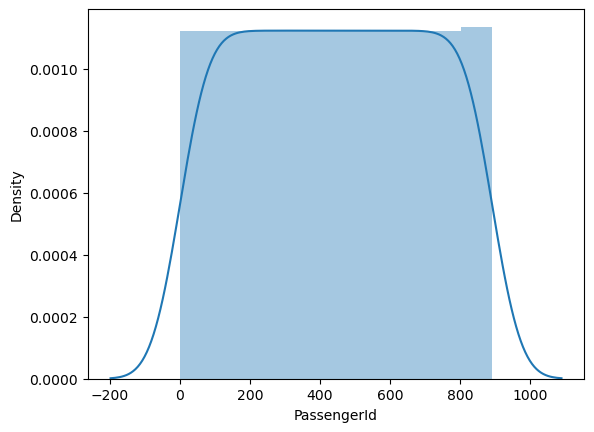

Survived


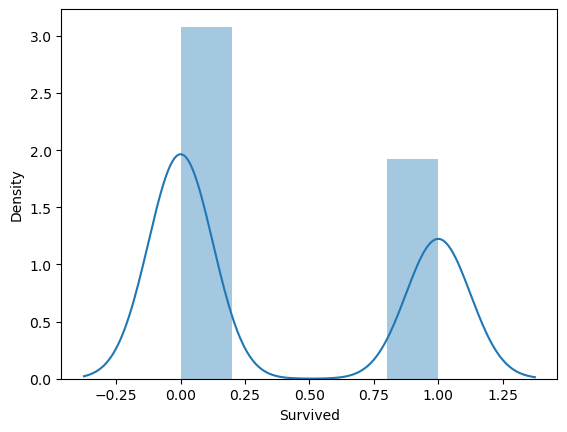

Pclass


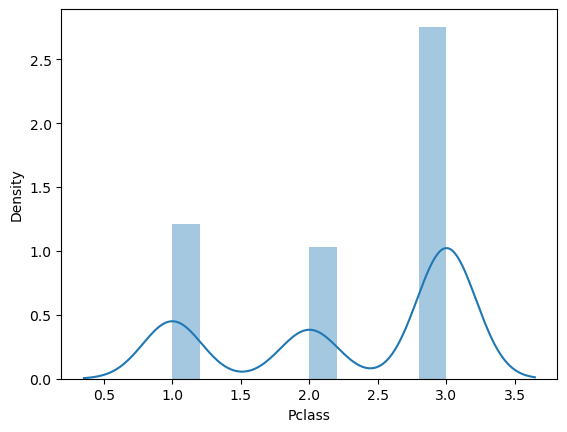

Age


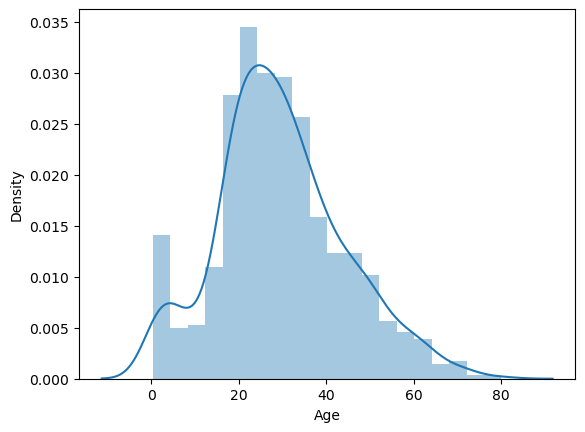

SibSp


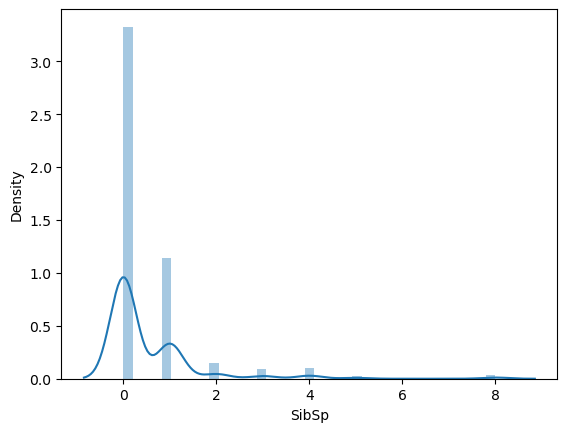

Parch


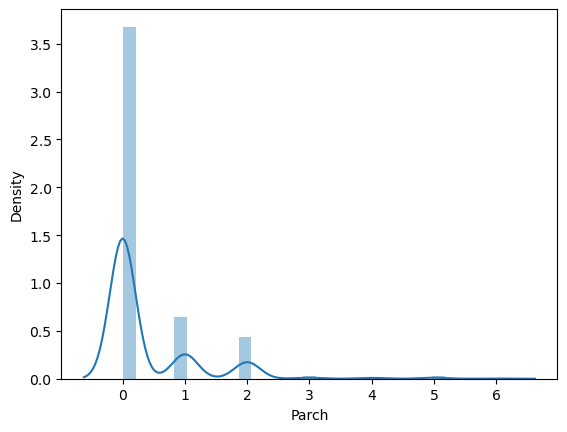

Fare


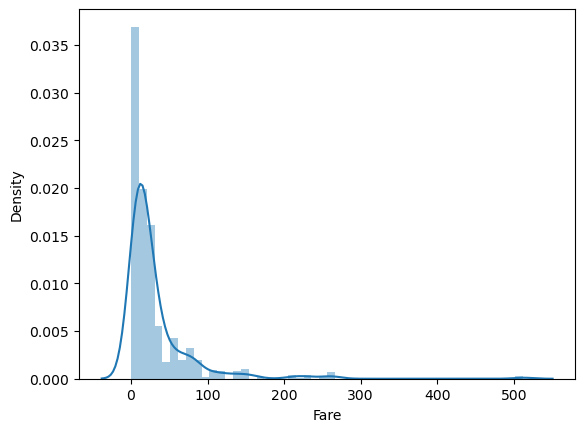

In [7]:
for col_name in df.select_dtypes("number").columns:
    print(col_name)
    sns.distplot(df[col_name])
    plt.show()

In [8]:
df[df["Age"]<1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [9]:
df[df["SibSp"]>6]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [10]:
df[df["Parch"]>3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [11]:
df[df["Fare"] == df["Fare"].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [12]:
# Handling Outliers
df["Fare"][df["Fare"]>250] = 250

In [13]:
df[df["Fare"] == df["Fare"].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,250.0,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,250.0,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,250.0,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,250.0,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,250.0,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,250.0,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,250.0,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,250.0,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,250.0,B57 B59 B63 B66,C


<Axes: ylabel='Fare'>

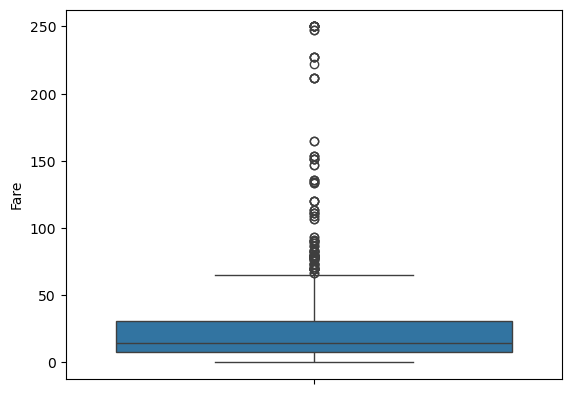

In [14]:
sns.boxplot(df["Fare"])

PassengerId


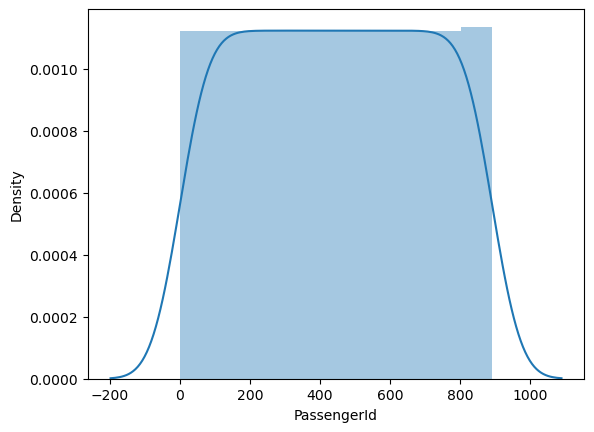

Survived


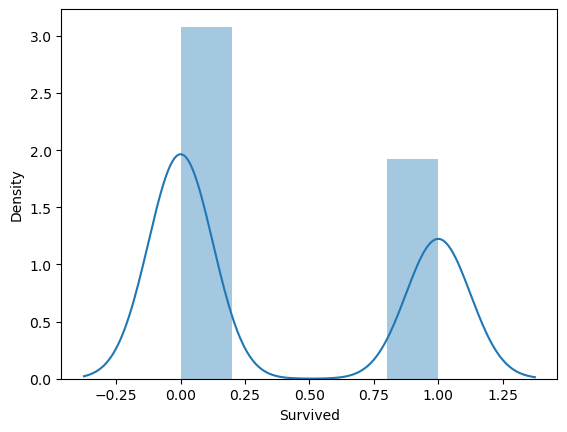

Pclass


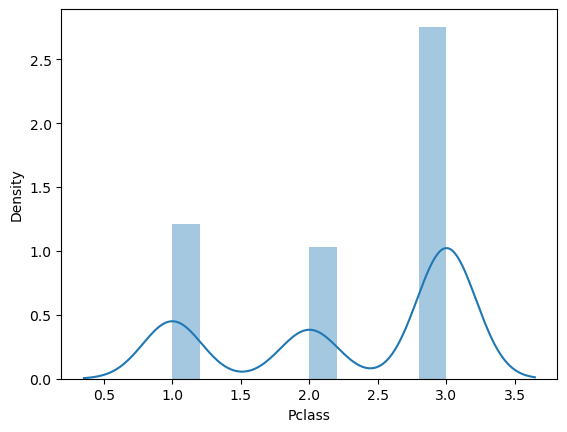

Age


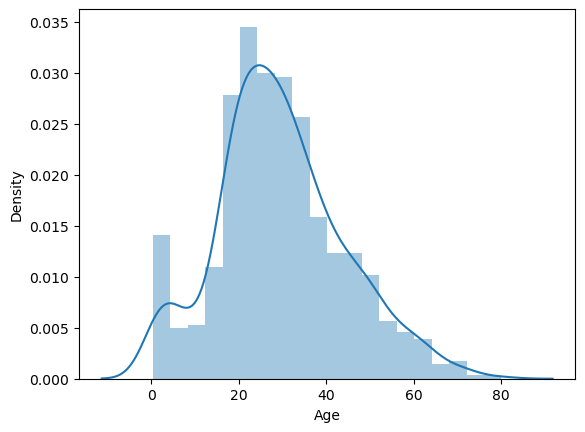

SibSp


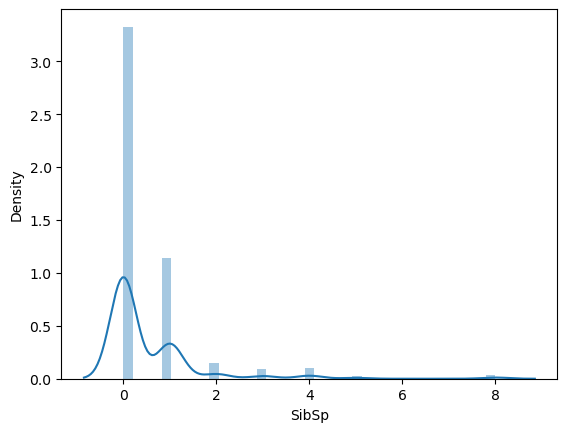

Parch


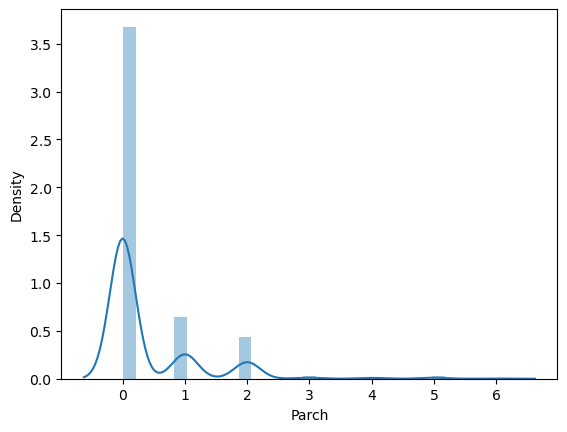

Fare


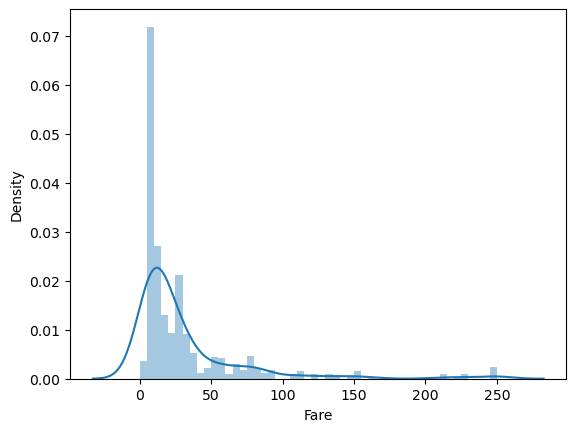

In [15]:
for col_name in df.select_dtypes("number").columns:
    print(col_name)
    sns.distplot(df[col_name])
    plt.show()

In [16]:
df["IsRich"] = df["Fare"]>60
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsRich
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,False


#### **Handling Null Values: -**

In [17]:
# Finding null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
IsRich           0
dtype: int64

In [18]:
# Percentage of null values.
round((df.isnull().sum() / len(df))*100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
IsRich          0.00
dtype: float64

In [19]:
df["Cabin"].notnull()
df["Iscabin"] = df["Cabin"].notnull()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsRich,Iscabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False


In [20]:
df.drop("Cabin", axis = 1, inplace = True)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,IsRich,Iscabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,False


In [22]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,IsRich,Iscabin
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,True,True
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,True,True


In [23]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Embarked'>

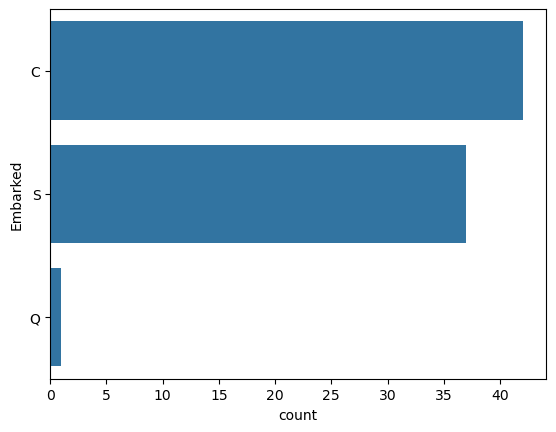

In [29]:
sns.countplot(df["Embarked"][(df["Survived"]==1) & df["IsRich"] == True])

In [24]:
df["Embarked"] = df["Embarked"].fillna("C")

In [25]:
df["Age"].mean()

29.69911764705882

In [26]:
df["Age"].median()

28.0

In [27]:
df.groupby(["Embarked"])["Age"].median()

Embarked
C    29.0
Q    27.0
S    28.0
Name: Age, dtype: float64

In [28]:
df.groupby(["Pclass"])["Age"].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [29]:
df["Age"][df["Pclass"]==1] = df["Age"][df["Pclass"]==1].fillna(37)
df["Age"][df["Pclass"]==2] = df["Age"][df["Pclass"]==2].fillna(29)
df["Age"][df["Pclass"]==3] = df["Age"][df["Pclass"]==3].fillna(24)

In [30]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
IsRich         0
Iscabin        0
dtype: int64

In [31]:
# Dropping irrevelent columns.
df.drop(["PassengerId", "Name", "Ticket"], axis = 1, inplace = True)

Here we identified that PassengerId, Name, and Ticket are not that revelent for our prediction.  
Thus we remove those columns from our dataset.  
We usually keep the name column which is a categorical 

In [32]:
# Feature Encoding (One Hot Encoding)
df = pd.get_dummies(df, drop_first=True, dtype = int)

In [33]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,IsRich,Iscabin,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,False,1,0,1
1,1,1,38.0,1,0,71.2833,True,True,0,0,0
2,1,3,26.0,0,0,7.9250,False,False,0,0,1
3,1,1,35.0,1,0,53.1000,False,True,0,0,1
4,0,3,35.0,0,0,8.0500,False,False,1,0,1


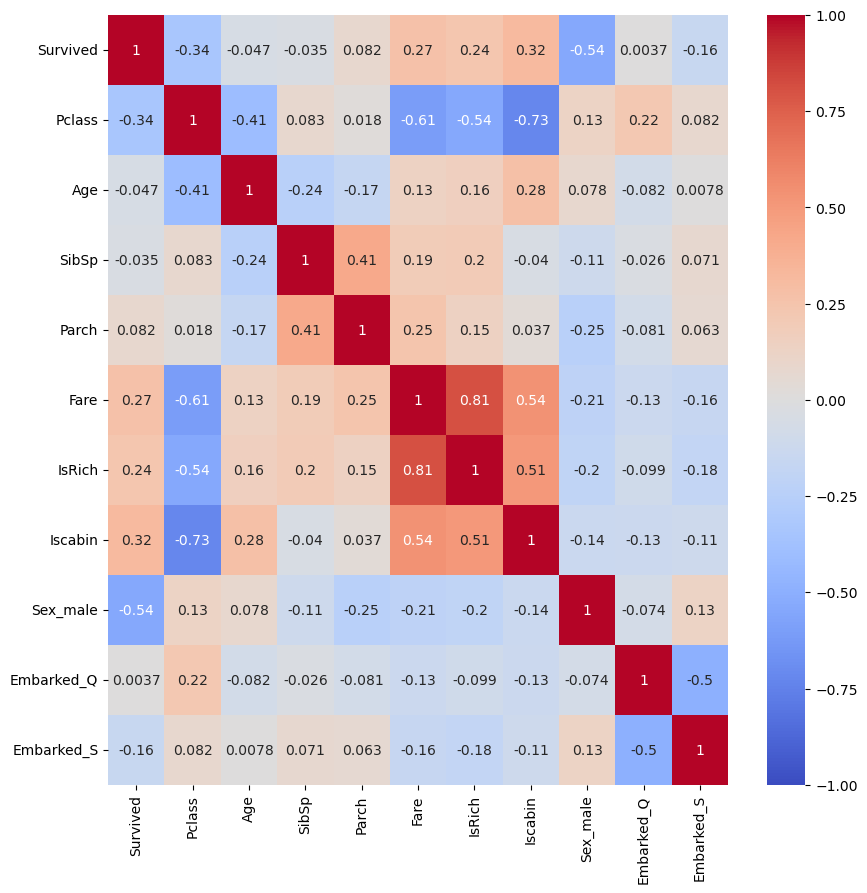

In [34]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, vmin = -1, cmap = "coolwarm");

#### **Feature Engineering: -**

In [35]:
df["FamilySize"] = df["SibSp"]+df["Parch"]+1

In [36]:
df["IsAlone"] = df["FamilySize"] == 1

In [37]:
df["Adult"] = (df["Age"]>25) & (df["Age"]<=50)

In [38]:
df["Old"] = df["Age"]>50

In [44]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,IsRich,Iscabin,Sex_male,Embarked_Q,Embarked_S,FamilySize,IsAlone,Adult,Old
0,0,3,22.0,1,0,7.2500,False,True,1,0,1,2,False,False,False
1,1,1,38.0,1,0,71.2833,True,False,0,0,0,2,False,True,False
2,1,3,26.0,0,0,7.9250,False,True,0,0,1,1,True,True,False
3,1,1,35.0,1,0,53.1000,False,False,0,0,1,2,False,True,False
4,0,3,35.0,0,0,8.0500,False,True,1,0,1,1,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,True,1,0,1,1,True,True,False
887,1,1,19.0,0,0,30.0000,False,False,0,0,1,1,True,False,False
888,0,3,24.0,1,2,23.4500,False,True,0,0,1,4,False,False,False
889,1,1,26.0,0,0,30.0000,False,False,1,0,0,1,True,True,False


#### **Feature Transformation: -**

<Axes: xlabel='Fare', ylabel='Density'>

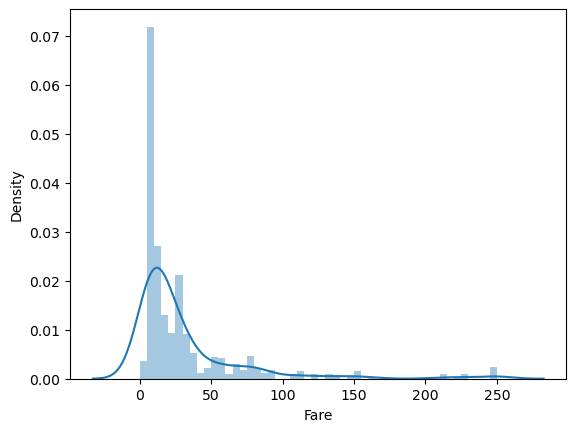

In [40]:
sns.distplot(df["Fare"])

In [41]:
np.log1p(df["Fare"])

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
886    2.639057
887    3.433987
888    3.196630
889    3.433987
890    2.169054
Name: Fare, Length: 891, dtype: float64

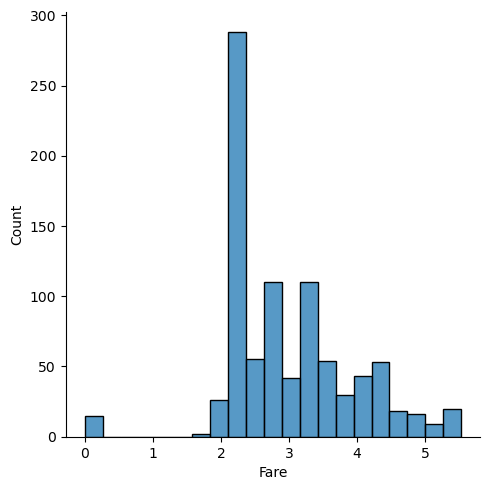

In [42]:
sns.displot(np.log1p(df["Fare"]))

In [43]:
df["Fare"] = np.log1p(df["Fare"])

#### **Feature Scaling: -**

In [45]:
from sklearn.preprocessing import StandardScaler

In [44]:
X = df.drop("Survived", axis = 1)
y = df["Survived"]

In [46]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [50]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [51]:
from sklearn.metrics import classification_report
print("Training Validation")
print(classification_report(y_train, y_pred_train))
print("Testing Validation")
print(classification_report(y_test, y_pred_test))

Training Validation
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       450
           1       0.74      0.72      0.73       262

    accuracy                           0.80       712
   macro avg       0.79      0.79      0.79       712
weighted avg       0.80      0.80      0.80       712

Testing Validation
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.85      0.75      0.79        80

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [52]:
import joblib
joblib.dump(lr, "Titanic Survivours Prediction Model 05-09-2025.pkl")

['Titanic Survivours Prediction Model 05-09-2025.pkl']